In this notebook I have coded a single variable linear regression from scratch and then compared it with scikit -learn's implementation to see which model performed better.




First lets implement from scratch.

In [ ]:
#Import the required modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
#plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [ ]:
# This is some random data i have specified.
x = np.array(range(1,31))
y= np.array([ 1,  3,  3.8,  4.7,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17.5,
       18.23, 19.4, 23, 24, 25, 23, 24.7, 25.6, 26, 31, 32, 36, 40])

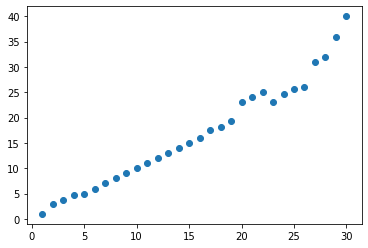

In [16]:
#plot data
plt.scatter(x,y)

In [50]:
N= len(x)
learningrate = 0.001
epochs = 2000
m = 0
c = 0


In [51]:
for i in range(epochs):
    #Gradient descent w.r.t weight and bias
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m*x +c))))
    dc = (2.0/N) * -np.sum(y - (m*x + c))
    #update weight and bias at each step
    m = m -learningrate * dm
    c = c - learningrate * dm
print(m, c)

1.051032258064516 1.051032258064516


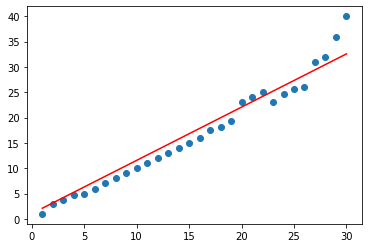

In [54]:
Y_pred = m*x + c
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')# regression line
plt.show()

MSE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y, Y_pred)

R**2 value


In [58]:
r2_score(y, Y_pred) 

0.9560678325606237

#we got a r2 score close to one which is a good indicaton

Now lets implement the linear regression on the same dataset but with scikit-learn

In [60]:
from sklearn import  linear_model

#define instance
regr = linear_model.LinearRegression()

In [61]:
# Train the model using the training sets
regr.fit(x.reshape(-1,1), y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
Y_pred_2  = regr.predict(x.reshape(-1,1))


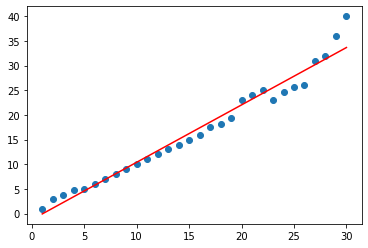

In [63]:
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred_2), max(Y_pred_2)], color='red')  # regression line
plt.show()

In [42]:
print('Mean squared error: %.2f'
      % mean_squared_error(y, Y_pred_2))

Mean squared error: 3.36


R**2 score for first model was 0.9560678325606237.

In [43]:
r2_score(y, Y_pred_2) 

0.9679630273725188

#the scikit-learn model did a little better.

Yellow line is for scikit learn model and black line is for the modle we implemented from scratch.

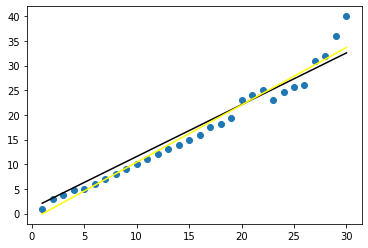

In [64]:
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='black')
plt.plot([min(x), max(x)], [min(Y_pred_2), max(Y_pred_2)], color='yellow')# regression line
plt.show()

End: the scikit learn model performed a little better.